In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data_gene_expressions = pd.read_csv('data/Colorectal Cancer Gene Expression Data.csv', sep=',')
raw_data_gene_expressions = raw_data_gene_expressions.drop("S.No", axis=1)
df_gene = raw_data_gene_expressions.transpose()

col_names = df_gene.iloc[0].tolist()
df_gene.columns = col_names
df_gene = df_gene.drop(axis = 0,index="0")
df_gene = df_gene.reset_index(drop=True)

#obj to float
features = df_gene.columns.tolist()[1:]
df_gene[features] = df_gene[features].astype(float)
df_gene

,ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,8.295322,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,5.694010,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


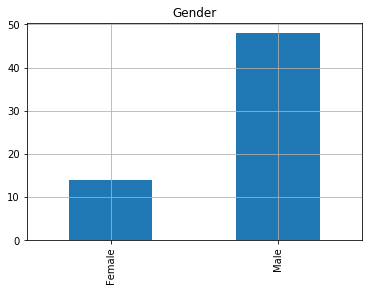

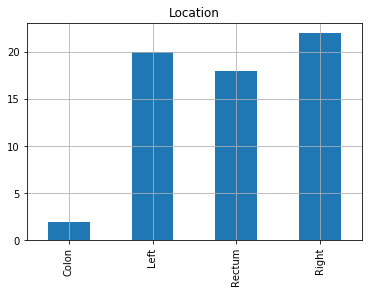

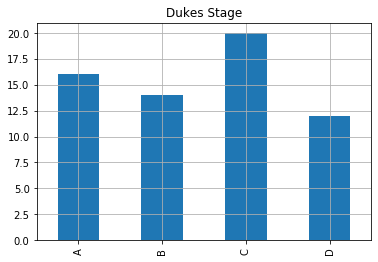

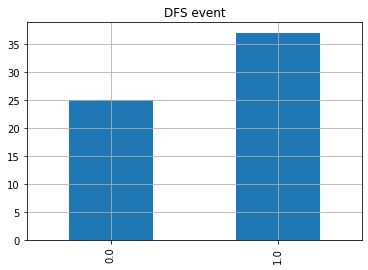

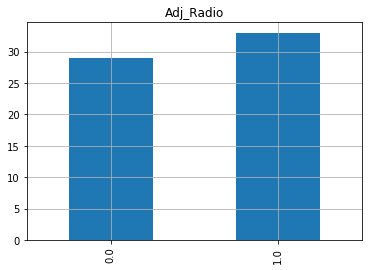

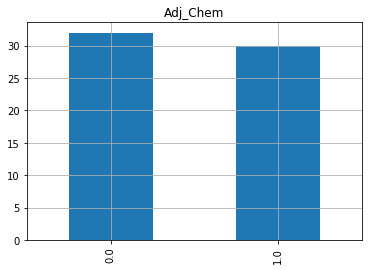

In [3]:
raw_patient_data = pd.read_csv('data/Colorectal Cancer Patient Data.csv', sep=",")
raw_patient_data = raw_patient_data.drop("S.No", axis=1)

categorical_vars = raw_patient_data[[
    'Gender', 
    'Location', 
    'Dukes Stage', 
    'DFS event', 
    'Adj_Radio', 
    'Adj_Chem'
]]

for name in categorical_vars:
    categorical_vars[name].value_counts().sort_index().plot(kind='bar')
    plt.title(name)
    plt.grid()
    plt.show()

In [4]:
df_combined = raw_patient_data.join(other=df_gene.set_index('ID_REF'), on='ID_REF', how='left')
df_combined.to_csv('data/Merged Colorectal Cancer Patient Data.csv')
df=df_combined
df

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


# CMIM ( Filter Stage )

#### Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
Label_Encoders = {
    "Dukes Stage":None,
    "Gender": None,
    "Location": None
}

for label in Label_Encoders.keys():
    Label_Encoders[label] = LabelEncoder()
    transformed = Label_Encoders[label].fit_transform(df[label])
    df[label] = transformed

df.head(10)

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,0,1,1,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,1,1,1,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,2,0,1,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,3,0,1,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,2,1,1,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
5,GSM877131,61.0,0,1,3,65.0,0.0,1.0,1.0,6.863884,...,3.670824,2.574947,3.374645,5.802268,3.387126,3.821213,4.685555,2.683305,8.421115,2.880351
6,GSM877132,59.0,2,1,1,32.0,1.0,1.0,1.0,5.430316,...,3.426951,2.682498,3.329273,5.525942,2.963539,3.976654,4.473672,2.764213,6.790053,2.659746
7,GSM877133,50.0,1,1,3,43.0,1.0,0.0,0.0,4.285183,...,3.839959,2.954999,3.276999,6.390125,3.301401,4.009738,4.673572,2.526576,5.367715,2.807515
8,GSM877134,54.0,1,1,3,80.0,0.0,1.0,1.0,4.903302,...,3.849475,2.691285,3.233836,6.133868,3.479974,4.148965,4.655666,2.407719,6.392214,2.691533
9,GSM877135,68.0,2,0,2,94.0,0.0,0.0,0.0,6.530134,...,3.678749,2.758406,3.474470,5.900903,3.974126,5.117710,3.935249,2.753260,7.903482,2.750338


In [7]:
Label_Encoders['Gender'].inverse_transform([1])

array(['Male'], dtype=object)

In [8]:
#float to int
labels = [
    "Age (in years)",
    "DFS (in months)",
    "DFS event",
    "Adj_Radio",
    "Adj_Chem",
]

for label in labels :
    df[label] = df[label].astype(int)
df

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62,0,1,1,108,0,1,0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77,1,1,1,40,1,1,0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66,2,0,1,49,0,1,0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72,3,0,1,45,0,1,1,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75,2,1,1,40,0,0,1,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54,2,1,1,22,1,0,0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48,3,1,3,64,0,1,0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65,2,1,1,25,1,1,0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71,0,1,2,58,1,1,0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


## Initalizing training data

In [9]:
Y = df['DFS event']
Y

0     0
1     1
2     0
3     0
4     0
     ..
57    1
58    0
59    1
60    1
61    1
Name: DFS event, Length: 62, dtype: int32

In [10]:
drop_labels = [
   "DFS event",
   "ID_REF"
]
# axis-0 (rows) axis-1 (columbs)
X = df.drop(drop_labels, axis = 1)
x_labels = X.columns
X

,Age (in years),Dukes Stage,Gender,Location,DFS (in months),Adj_Radio,Adj_Chem,117_at,1007_s_at,1053_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,62,0,1,1,108,1,0,6.029834,9.468893,7.187090,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,77,1,1,1,40,1,0,6.344321,9.994204,7.705626,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,66,2,0,1,49,1,0,5.023127,10.409823,7.934057,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,72,3,0,1,45,1,1,4.612727,10.596921,7.446374,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,75,2,1,1,40,0,1,5.865944,10.252547,7.141105,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,54,2,1,1,22,0,0,4.835558,10.343581,7.471584,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,48,3,1,3,64,1,0,5.694010,9.409749,7.488735,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,65,2,1,1,25,1,0,8.661629,10.427298,7.512632,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,71,0,1,2,58,1,0,5.702601,10.309094,7.476872,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


## Pre-processing by CMIM

In [11]:
from CMIM import cmim

In [12]:
features_indices, objective_value, mutual_information = cmim(X.to_numpy(), Y.to_numpy(), n_selected_features=200)
features_indices,mutual_information

 10%|████                                   | 200/1942 [05:14<45:38,  1.57s/it]


(array([  7,   5,   6,   0,   1,   3,   4,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

### Selection of top features from candidates

In [13]:
def get_subset_indices(features_index, mutual_information, threshold=0.53):
    return [idx for idx, mutual_info in zip(features_index,mutual_information) if mutual_info > abs(threshold)]

#print(features_indices,len(features_indices))
subset_indices =  get_subset_indices(
    features_index=features_indices, 
    mutual_information=mutual_information,
    threshold=0.91
)

In [14]:
sub_set = pd.DataFrame()
for i in subset_indices:
    label = x_labels[i]
    sub_set[label] = df[label]
sub_set.head(5)

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1552514_at,1552515_at,1552518_s_at,1552519_at,1552520_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at
0,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.748200,...,2.873318,3.168543,4.638819,6.218171,2.652381,2.598712,3.211101,5.145399,3.028342,5.916073
1,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,8.295322,3.114340,...,3.080480,3.233863,4.179714,5.558357,2.742409,2.727733,3.473776,5.310652,3.073267,5.945679
2,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.172270,...,2.887993,3.497343,4.418066,6.816407,3.291181,2.814038,3.195605,5.122642,3.104967,5.900061
3,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.143341,3.238798,4.612277,6.265118,2.924158,2.664584,3.637300,5.349673,3.337221,6.039003
4,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,3.338311,...,3.155982,3.556409,4.675555,5.598414,3.008713,2.515682,3.312791,5.151390,2.848157,5.479068


# Binary Genetic Algorithm (Wrapper stage) 

In [15]:
def naive_bias(x_data, y_data):

    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(x_data,y_data,test_size = 0.3)

    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()

    model.fit(X_train, Y_train)

    return model.score(X_test, Y_test)

In [16]:
def get_data_from_gene(binary_gene):
    drop_indices = [idx for idx, val in enumerate(binary_gene) if val == 0 ]
    return sub_set.drop(sub_set.columns[drop_indices], axis="columns")

In [17]:
# Fitness function = NB(x) * w + (β / mod(α - β))
W = 0.1
def fitness(binary_gene):
        β = sum(binary_gene) # This gives us the number of selected features

        α = len(binary_gene) # This gives us the total number of available features
        

        feed_data = get_data_from_gene(binary_gene)
        if feed_data is None or β == 0:
            return 0
        acc = naive_bias(feed_data, Y)

        if not β == α:
            score = acc*W + (β/abs(β-α))
        else:
            score = acc*W
        
        return score

In [18]:
from bga import BGA

In [19]:
num_pop = 20
problem_dimentions = sub_set.shape[1]

test = BGA(pop_shape=(num_pop, problem_dimentions), method=fitness, p_c=0.8, p_m=0.2, max_round = 1000, early_stop_rounds=None, verbose = None, maximum=True)
best_solution, best_fitness = test.run()

100%|██████████████████████████████████████| 1000/1000 [02:20<00:00,  7.10it/s]



 Solution: [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1] 
 Fitness: 190.0842105263158 
 Evaluation times: 20020


## Crossfold validation of different algorithms 

In [20]:
len(best_solution)

191

In [21]:
data_frame = get_data_from_gene(best_solution)
data_frame

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1431_at,1438_at,...,1552514_at,1552515_at,1552518_s_at,1552519_at,1552520_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at
0,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,3.748200,6.957488,...,2.873318,3.168543,4.638819,6.218171,2.652381,2.598712,3.211101,5.145399,3.028342,5.916073
1,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,3.114340,7.366494,...,3.080480,3.233863,4.179714,5.558357,2.742409,2.727733,3.473776,5.310652,3.073267,5.945679
2,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,4.172270,9.190242,...,2.887993,3.497343,4.418066,6.816407,3.291181,2.814038,3.195605,5.122642,3.104967,5.900061
3,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,3.625413,7.493741,...,3.143341,3.238798,4.612277,6.265118,2.924158,2.664584,3.637300,5.349673,3.337221,6.039003
4,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,3.338311,6.068710,...,3.155982,3.556409,4.675555,5.598414,3.008713,2.515682,3.312791,5.151390,2.848157,5.479068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,3.161023,6.052478,...,3.293018,3.081430,5.012683,6.082347,2.804066,2.592935,3.598416,5.295031,3.047894,5.575947
58,5.694010,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,3.392471,6.926154,...,3.560086,3.420629,4.789115,4.288997,3.086380,2.766939,3.545961,5.207028,2.727635,5.700189
59,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,3.381974,6.081336,...,2.976635,2.988458,4.813702,6.347544,3.071046,2.652587,3.141052,5.280003,3.067907,5.463050
60,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,3.222998,7.979070,...,3.670448,3.119444,5.080660,6.466845,2.935967,2.504243,3.289709,5.020175,3.069636,5.691295


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
def svm(X, Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
    model = SVC()
    model.fit(X_train, Y_train)

    return model.score(X_test, Y_test)

def knn(X, Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)

    return model.score(X_test, Y_test)

def decision_tree(X, Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    return model.score(X_test, Y_test)

In [24]:
models = [
    svm, 
    knn, 
    decision_tree,
]
acc = []
for model in models:
    acc.append(model(data_frame,Y))

for i in acc:
    print(i*100)


C:\Users\ManOnFire\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


36.84210526315789
57.89473684210527
63.1578947368421
